In [1]:
import numpy as np
import scipy.stats as stats             # For distribution functions
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d # For 3D graphs

plt.rcParams['axes.axisbelow'] = True   # Set axes and grid elements to be below the figure
# %matplotlib widget

## Constant Elasticity of Variance (CEV) Model

![CEV](cev_process.png)

In [2]:
N_SIMS = 20000                          # TODO: number of simulations
N_STEPS = 200                           # TODO: number of steps
T = 1                                   # TODO: time horizon
X0 = 100                                # TODO: initial value

MU = 0.05                               # TODO: drift
SIGMA = 0.2                             # TODO: volatility
BETA = 1                                # TODO: elasticity of variance

dt = T / N_STEPS                        # Time step
t_steps = np.arange(0, T + dt, dt)      # Time step array

# SIMULATION =========================================================================================================
X = np.vstack([
    np.full(N_SIMS, X0),
    np.zeros((N_STEPS, N_SIMS))
])
Z = np.random.normal(size=(N_STEPS, N_SIMS))

# 1. Euler-Maruyama method ----------------------------------------------------------------------------------------------
for i in range(N_STEPS):
    X[i + 1] = X[i] + MU * X[i] * dt + SIGMA * X[i]**BETA * np.sqrt(dt) * Z[i]
    X[i + 1] = np.maximum(X[i + 1], 0)

# STATISTICS =========================================================================================================
exact_mean = X0 * np.exp(MU * t_steps)

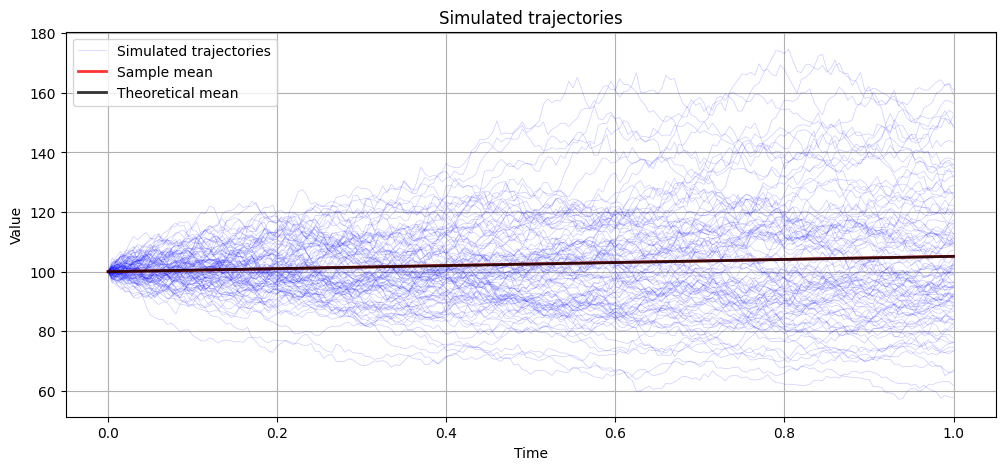

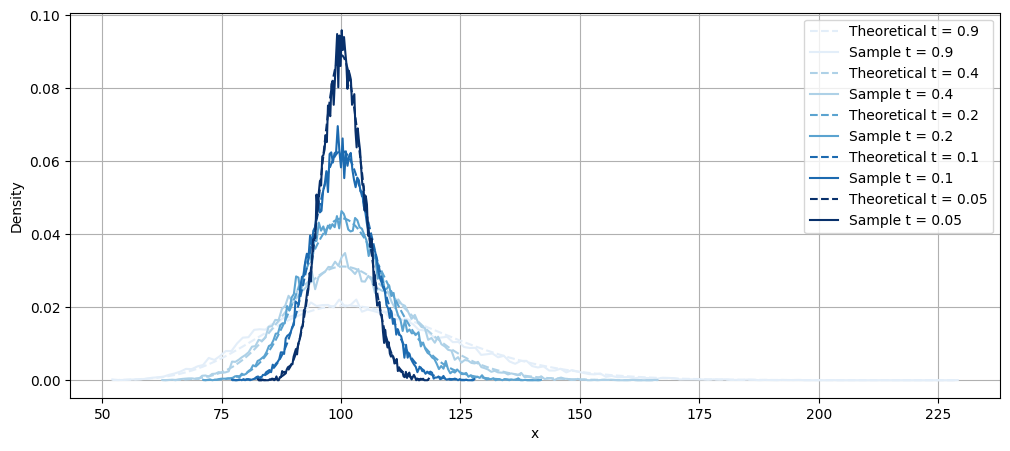

In [3]:
# TRAJECTORIES =======================================================================================================
plt.figure(figsize = (12, 5), clear = True)

plt.title('Simulated trajectories')
plt.plot(t_steps, X[:,:100], linewidth = 0.5, color = "blue", alpha = 0.2, label = 'Simulated trajectories')
plt.plot(t_steps, X.mean(axis = 1), linewidth = 2, color = "red", alpha = 0.8, label = 'Sample mean')
plt.plot(t_steps, exact_mean, linewidth = 2, color = "black", alpha = 0.8, label = 'Theoretical mean')


handles, labels = plt.gca().get_legend_handles_labels() # This gets the handles and labels of the current axes
by_label = dict(zip(labels, handles)) # dict(zip(keys, values)) is a way to create a dictionary from two lists
plt.legend(by_label.values(), by_label.keys())

plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()

# HISTOGRAMS ==========================================================================================================
SLICES = [0.05, 0.1, 0.2, 0.4, 0.9]       # FIXME: times to plot

plt.figure(figsize = (12, 5), clear = True)

colors = plt.cm.Blues(np.linspace(0.1, 1, len(SLICES))) # Inverse grey color direction

for i, time in enumerate(SLICES[::-1]): # Reverse slices so the nearest time is plotted at the front layer
    p, x = np.histogram(X[int(time * N_STEPS)], bins = 150, density = True)
    x = (x[:-1] + x[1:]) / 2 # Get the middle point of each bin

    # Compute theoretical distribution # FIXME: cannot compute theoretical distribution
    # Z0 = X0**(-2 * BETA) / (4 * BETA**2)
    # tau = (np.exp(2 * BETA * MU * time) - 1) / (2 * BETA * MU)
    # d = (2 * BETA + 1) / BETA
    # lam = 4 * Z0 / tau
    # k = SIGMA**2 * BETA**2 * tau * np.exp(-2 * BETA * MU * time)

    # f = stats.ncx2.pdf(x, df = d, nc = lam, scale = k)

    # Compute theoretical distribution
    # f = stats.lognorm.pdf(x, s = SIGMA * np.sqrt(time), scale = X0 * np.exp(MU * time))

    plt.plot(x, f, color = colors[i], linestyle = "--", label = f"Theoretical t = {time}")
    plt.plot(x, p, color = colors[i], linestyle = "-", label = f"Sample t = {time}")

plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()